A importação das bibliotecas juntamente com o conjunto de dados utilizado foi realizado da seguinte maneira:

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 40.9 MB/s 
     |████████████████████████████████| 16.7 MB 307 kB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

O conjunto de dados analisado foi encontrado através do repositório "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University". A exibição dos dados que o Google utiliza também é baseada no mesmo dataset:

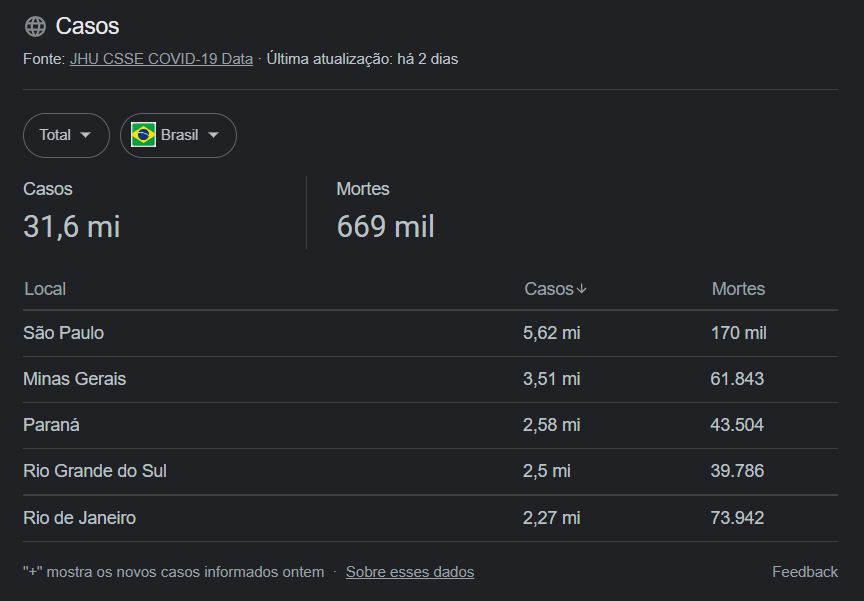

Dentro do repositório acima, podemos ver que a obtenção dos dados relacionados ao Brasil é realizada por Wesley Cota da Universidade federal de viçosa. O repositório dele pode ser encontrado a partir de : https://github.com/wcota/covid19br

In [4]:
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
!wget https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg 
!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-16/esus-vepi.LeitoOcupacao_2021.csv
!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-18/esus-vepi.LeitoOcupacao_2022.csv 
!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-18/esus-vepi.LeitoOcupacao_2020.csv

--2022-07-26 04:00:11--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3810734 (3.6M) [text/plain]
Saving to: ‘cases-brazil-states.csv’

cases-brazil-states 100%[===================>]   3.63M  --.-KB/s    in 0.08s   

2022-07-26 04:00:11 (48.2 MB/s) - ‘cases-brazil-states.csv’ saved [3810734/3810734]

--2022-07-26 04:00:11--  https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372666368 (355M)
Savi

Podemos ver todas as colunas da base de dados a seguir:

---



# Carregamento da base dos leitos

In [5]:
leitos_file1 = pd.read_csv('./esus-vepi.LeitoOcupacao_2020.csv')  
leitos_file2 = pd.read_csv('./esus-vepi.LeitoOcupacao_2021.csv') 
leitos_file3 = pd.read_csv('./esus-vepi.LeitoOcupacao_2022.csv')  
leitos_file = pd.concat([leitos_file1, leitos_file2, leitos_file3])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
to_drop = ['Unnamed: 0','cnes','_p_usuario','_created_at','_updated_at','origem','excluido','validado','estado','municipio']
leitos_file.drop(to_drop, inplace=True, axis=1) 
newDF = leitos_file.dropna() 
newDF.sort_values(['estadoNotificacao'])   

first_column = newDF.pop('estadoNotificacao')
second_column = newDF.pop('municipioNotificacao') 

  
newDF.insert(0, 'estadoNotificacao', first_column) 
newDF.insert(1, 'municipioNotificacao', first_column)

newDfTotal = newDF    

newDfTotal['totalOcupacaoSuspeita'] = newDfTotal['ocupacaoSuspeitoCli'] + newDfTotal['ocupacaoSuspeitoUti']
newDfTotal['totalOcupacaoConfirmados'] = newDfTotal['ocupacaoConfirmadoCli'] + newDfTotal['ocupacaoConfirmadoUti']
newDfTotal['totalOcupacaoCovid'] = newDfTotal['ocupacaoCovidCli'] + newDfTotal['ocupacaoCovidUti']
newDfTotal['totalOcupacaoHospitalar'] = newDfTotal['ocupacaoHospitalarUti'] + newDfTotal['ocupacaoHospitalarCli']


excluded_columns = ['ocupacaoSuspeitoCli', 'ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti','ocupacaoCovidCli','ocupacaoCovidUti','ocupacaoHospitalarUti','ocupacaoHospitalarCli' ]

for i in excluded_columns: 
  newDfTotal.pop(i)  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
data = pd.read_csv('./cases-brazil-states.csv',nrows = 0, sep=',')
data 

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants


In [ ]:
data.columns.values

array(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'], dtype=object)

Podemos selecionar quais colunas queremos analisar:

In [10]:
cols = ['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants']

In [11]:
cols = ['suspects','date','state','totalCases','vaccinated', 'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants','totalCases_per_100k_inhabitants','deaths','recovered']

In [12]:
data = pd.read_csv('./cases-brazil-states.csv', usecols = ['state'], sep=',') 
data

,state
0,SP
1,TOTAL
2,SP
3,TOTAL
4,SP
...,...
24229,SC
24230,SE
24231,SP
24232,TO


In [13]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
data

,date,state,deaths,totalCases,totalCases_per_100k_inhabitants,recovered,suspects,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,2020-02-25,SP,0,1,0.00218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,TOTAL,0,1,0.00047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,SP,0,1,0.00218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-26,TOTAL,0,1,0.00047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-27,SP,0,1,0.00218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24229,2022-07-25,SC,22186,1831364,25560.61673,1607144.0,268966.0,6237943.0,87.06389,5701626.0,79.57843,277356.0,3.87110,3491346.0,48.72923
24230,2022-07-25,SE,6406,339776,14781.24989,313577.0,445.0,1972991.0,85.83088,1808361.0,78.66899,42047.0,1.82917,1211705.0,52.71271
24231,2022-07-25,SP,172555,5883611,12813.00708,4850000.0,876238.0,42396507.0,92.32880,39856763.0,86.79788,1276302.0,2.77946,33095195.0,72.07291
24232,2022-07-25,TO,4182,337036,21428.14455,281464.0,359.0,1157010.0,73.56062,992190.0,63.08166,54944.0,3.49324,474217.0,30.14987


É possível observar um ruído nos dados anteriores, há a ocorrência de diversas linhas com o Estado de "TOTAL", que representa  o total de casos por dia, podemos retirá-las para conseguir identificar apenas os estados que possuem casos registrados por dia

In [14]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
filtro = data['state'] != 'TOTAL'
dataFiltred = data[filtro]
dataFiltred

,date,state,deaths,totalCases,totalCases_per_100k_inhabitants,recovered,suspects,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,2020-02-25,SP,0,1,0.00218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,SP,0,1,0.00218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-27,SP,0,1,0.00218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-02-28,SP,0,2,0.00436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02-29,SP,0,2,0.00436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24228,2022-07-25,RS,40373,2624124,23064.68204,2146461.0,10647.0,9722752.0,85.45792,9203579.0,80.89466,330054.0,2.90100,7045038.0,61.92221
24229,2022-07-25,SC,22186,1831364,25560.61673,1607144.0,268966.0,6237943.0,87.06389,5701626.0,79.57843,277356.0,3.87110,3491346.0,48.72923
24230,2022-07-25,SE,6406,339776,14781.24989,313577.0,445.0,1972991.0,85.83088,1808361.0,78.66899,42047.0,1.82917,1211705.0,52.71271
24231,2022-07-25,SP,172555,5883611,12813.00708,4850000.0,876238.0,42396507.0,92.32880,39856763.0,86.79788,1276302.0,2.77946,33095195.0,72.07291


Conseguimos identificar o tipo de cada campo

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   24234 non-null  object 
 1   state                                  24234 non-null  object 
 2   deaths                                 24234 non-null  int64  
 3   totalCases                             24234 non-null  int64  
 4   totalCases_per_100k_inhabitants        24234 non-null  float64
 5   recovered                              23591 non-null  float64
 6   suspects                               23640 non-null  float64
 7   vaccinated                             15503 non-null  float64
 8   vaccinated_per_100_inhabitants         15503 non-null  float64
 9   vaccinated_second                      14823 non-null  float64
 10  vaccinated_second_per_100_inhabitants  14823 non-null  float64
 11  va

In [ ]:
data.dtypes

date                                      object
state                                     object
deaths                                     int64
totalCases                                 int64
totalCases_per_100k_inhabitants          float64
recovered                                float64
suspects                                 float64
vaccinated                               float64
vaccinated_per_100_inhabitants           float64
vaccinated_second                        float64
vaccinated_second_per_100_inhabitants    float64
vaccinated_single                        float64
vaccinated_single_per_100_inhabitants    float64
vaccinated_third                         float64
vaccinated_third_per_100_inhabitants     float64
dtype: object

Conseguimos identificar todos os valores não preenchidos nas colunas

In [ ]:
data.isna().sum()

date                                         0
state                                        0
deaths                                       0
totalCases                                   0
totalCases_per_100k_inhabitants              0
recovered                                  643
suspects                                   594
vaccinated                                8731
vaccinated_per_100_inhabitants            8731
vaccinated_second                         9411
vaccinated_second_per_100_inhabitants     9411
vaccinated_single                        13310
vaccinated_single_per_100_inhabitants    13310
vaccinated_third                         15570
vaccinated_third_per_100_inhabitants     15570
dtype: int64

In [ ]:
data.describe()

,deaths,totalCases,totalCases_per_100k_inhabitants,recovered,suspects,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
count,24234.000000,2.423400e+04,24234.000000,2.359100e+04,2.364000e+04,1.550300e+04,15503.000000,1.482300e+04,14823.000000,1.092400e+04,10924.000000,8.664000e+03,8664.000000
mean,27359.340596,1.084689e+06,8376.706045,9.955450e+05,3.903337e+05,8.392484e+06,53.148667,6.630132e+06,40.781028,3.451243e+05,2.285847,4.006504e+06,22.071898
std,85899.966706,3.471357e+06,6502.506596,3.144648e+06,1.318382e+06,2.515316e+07,29.959062,2.106509e+07,28.163709,9.019994e+05,1.412608,1.294473e+07,17.138510
min,0.000000,1.000000e+00,0.000470,1.000000e+00,1.000000e+00,2.000000e+00,0.000010,1.000000e+00,0.000000,3.500000e+01,0.000080,1.000000e+00,0.000000
25%,2112.250000,1.081752e+05,2841.184750,1.040625e+05,1.381000e+03,6.291230e+05,22.082860,3.964295e+05,11.091740,5.050300e+04,1.690460,2.000160e+05,6.208947
50%,7050.000000,3.044410e+05,7545.992065,2.814640e+05,1.143500e+04,2.437130e+06,66.205950,1.760829e+06,45.795210,1.140330e+05,1.962360,9.348030e+05,20.149200
75%,17076.500000,7.044428e+05,12857.742697,6.523010e+05,1.484510e+05,5.863186e+06,77.989040,4.559371e+06,67.044645,2.617970e+05,2.503420,2.134781e+06,36.081430
max,677143.000000,3.362196e+07,29751.757430,2.738142e+07,8.866327e+06,1.798616e+08,96.646030,1.648217e+08,86.797880,5.346646e+06,9.298280,1.152890e+08,72.072910


In [ ]:
data['state'].value_counts()

SP       882
TOTAL    882
RJ       873
BA       872
ES       872
DF       871
AL       870
MG       870
RS       868
GO       866
PE       866
PR       866
RN       866
SC       866
AM       865
MS       864
SE       864
CE       862
AC       861
PA       860
PB       860
TO       860
PI       859
AP       858
MA       858
MT       858
RO       858
RR       857
Name: state, dtype: int64

In [ ]:
data['year'] = pd.DatetimeIndex(data['date']).year

Podemos fitrar os numeros totais de casos ocorrido dentro de um período específico. Como por exemplo:

In [ ]:
data_groupby = data.groupby('year')['totalCases'].sum()
data_groupby

year
2020     1784457032
2021    12414999752
2022    12086896958
Name: totalCases, dtype: int64

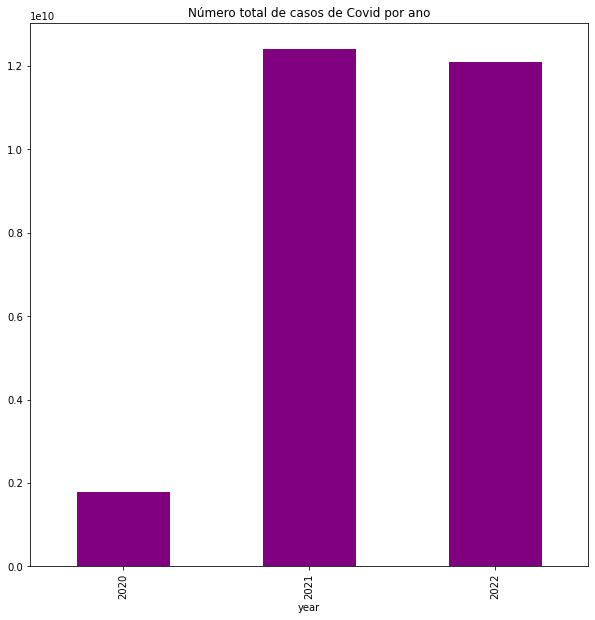

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Número total de casos de Covid por ano")
data_groupby.plot(kind='bar', x='date', y='totalCases', color='purple', label = 'totalCases')

## Relação entre vacinação e Estados

### Eliminando ruídos do dataset

In [ ]:
data_without_nan_values = data.dropna()
data_without_nan_values

,date,state,deaths,totalCases,totalCases_per_100k_inhabitants,recovered,suspects,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,year
15089,2021-09-02,MS,9403,369475,13295.31707,354985.0,1381.0,1836215.0,66.07500,1053662.0,37.91534,234861.0,8.45132,282.0,0.01015,2021
15105,2021-09-02,TOTAL,582003,20834790,9767.02635,19138604.0,7958935.0,133236457.0,62.45918,60244403.0,28.24164,4661248.0,2.18512,282.0,0.00013,2021
15117,2021-09-03,MS,9411,369733,13304.60103,357475.0,1381.0,1839113.0,66.17928,1067906.0,38.42790,234861.0,8.45132,373.0,0.01342,2021
15133,2021-09-03,TOTAL,582743,20858394,9778.09153,19243454.0,7958935.0,133983801.0,62.80953,61424341.0,28.79478,4669260.0,2.18888,373.0,0.00017,2021
15145,2021-09-04,MS,9418,369916,13311.18617,357475.0,1381.0,1844651.0,66.37856,1075969.0,38.71804,234871.0,8.45168,537.0,0.01932,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24229,2022-07-25,SC,22186,1831364,25560.61673,1607144.0,268966.0,6237943.0,87.06389,5701626.0,79.57843,277356.0,3.87110,3491346.0,48.72923,2022
24230,2022-07-25,SE,6406,339776,14781.24989,313577.0,445.0,1972991.0,85.83088,1808361.0,78.66899,42047.0,1.82917,1211705.0,52.71271,2022
24231,2022-07-25,SP,172555,5883611,12813.00708,4850000.0,876238.0,42396507.0,92.32880,39856763.0,86.79788,1276302.0,2.77946,33095195.0,72.07291,2022
24232,2022-07-25,TO,4182,337036,21428.14455,281464.0,359.0,1157010.0,73.56062,992190.0,63.08166,54944.0,3.49324,474217.0,30.14987,2022


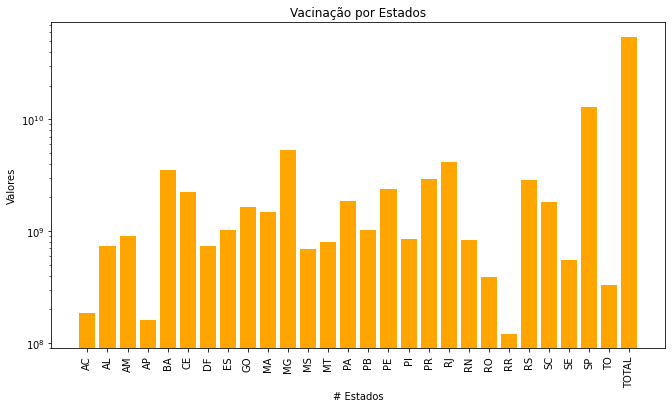

In [ ]:
vaccinated_per_state = data_without_nan_values.groupby('state')['vaccinated'].sum()

plt.figure(figsize =(11, 6))
plt.bar(vaccinated_per_state.index, vaccinated_per_state.values, color = 'orange')
plt.ylabel("Valores")
plt.xlabel("# Estados")
plt.title("Vacinação por Estados")
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.show()


## Analise de vacinação no estado de Minas Gerais

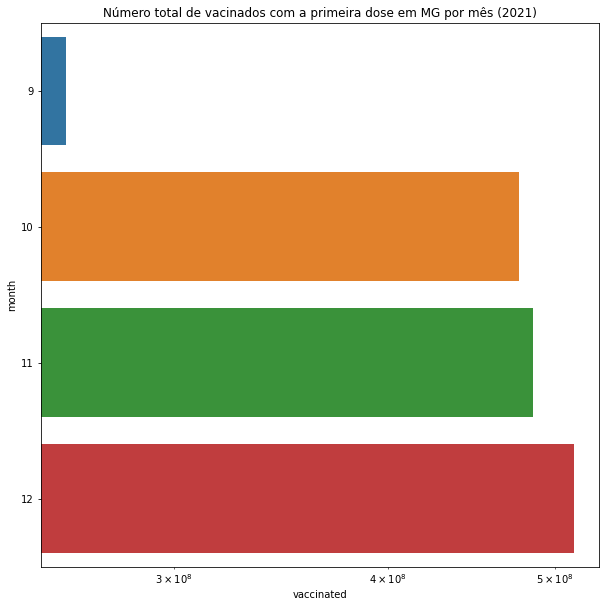

In [ ]:
def total_vaccinated_per_year_by_state(state,year):
    data_with_month_column = data_without_nan_values.assign(month = pd.DatetimeIndex(data_without_nan_values['date']).month)
    total_vaccinated_per_month_in_mg = data_with_month_column[data_with_month_column['state'] == state]
    return total_vaccinated_per_month_in_mg[total_vaccinated_per_month_in_mg['year'] == year]


def mg_vaccinated(field,title):
    mg_2021_single = total_vaccinated_per_year_by_state("MG",2021).groupby('month')[field].sum().reset_index()
    plt.figure(figsize=(10,10))
    g=sns.barplot(data=mg_2021_single, y='month', x=field, orient='h')
    g.set_xscale('log')
    plt.title(title)
    plt.show()

mg_vaccinated('vaccinated',"Número total de vacinados com a primeira dose em MG por mês (2021)")

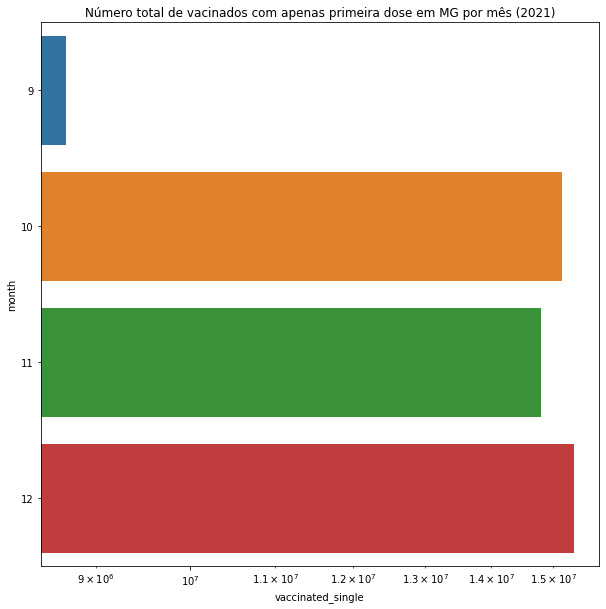

In [ ]:
mg_vaccinated('vaccinated_single','Número total de vacinados com apenas primeira dose em MG por mês (2021)')

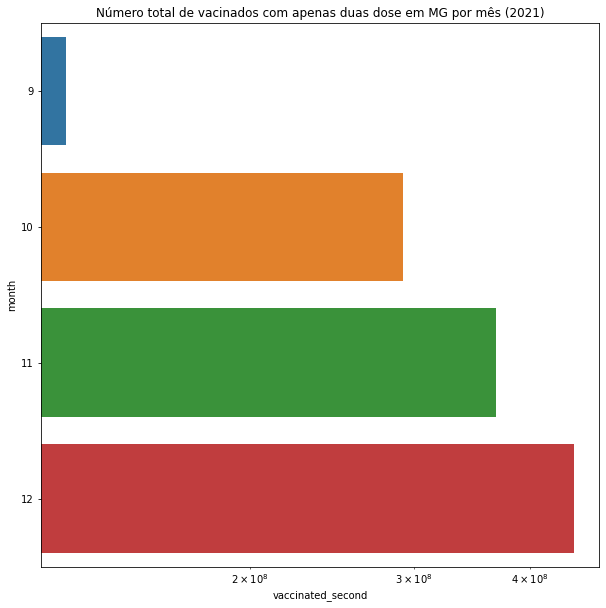

In [ ]:
mg_vaccinated('vaccinated_second','Número total de vacinados com apenas duas dose em MG por mês (2021)')

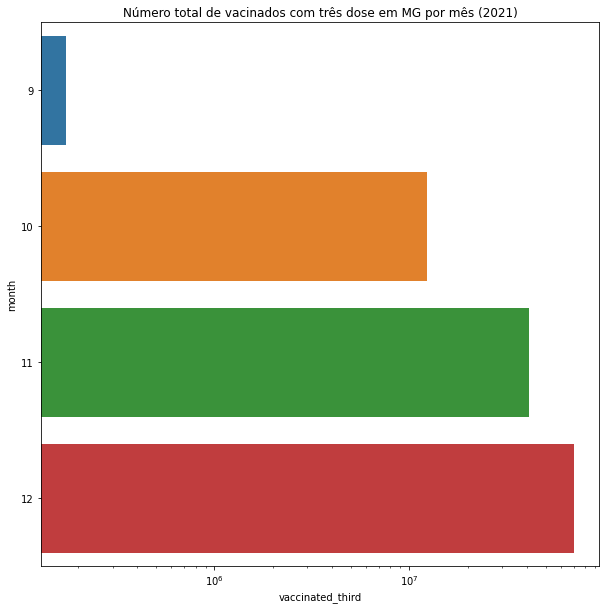

In [ ]:
mg_vaccinated('vaccinated_third','Número total de vacinados com três dose em MG por mês (2021)')

## Mapa de calor referente a vacinação

In [ ]:

display(data_without_nan_values.groupby('state')['vaccinated_per_100_inhabitants'].sum().sort_values())

state
AP       19103.33216
RR       19983.81297
AC       20789.48551
TO       21061.31480
MA       21136.12592
PA       21475.91618
RO       21676.13839
AM       21763.91979
AL       22035.84518
MT       22887.84782
BA       23433.88525
GO       23480.04406
RN       23829.72098
RJ       23851.80032
SE       24174.17143
DF       24460.16213
CE       24554.01673
MS       24799.45871
RS       25061.67290
PE       25112.09828
MG       25166.34059
PB       25210.83086
TOTAL    25465.30413
ES       25617.65376
SC       25661.04186
PR       25747.41247
PI       25953.83796
SP       28097.74296
Name: vaccinated_per_100_inhabitants, dtype: float64

### Vacinados por 100k de Habitantes

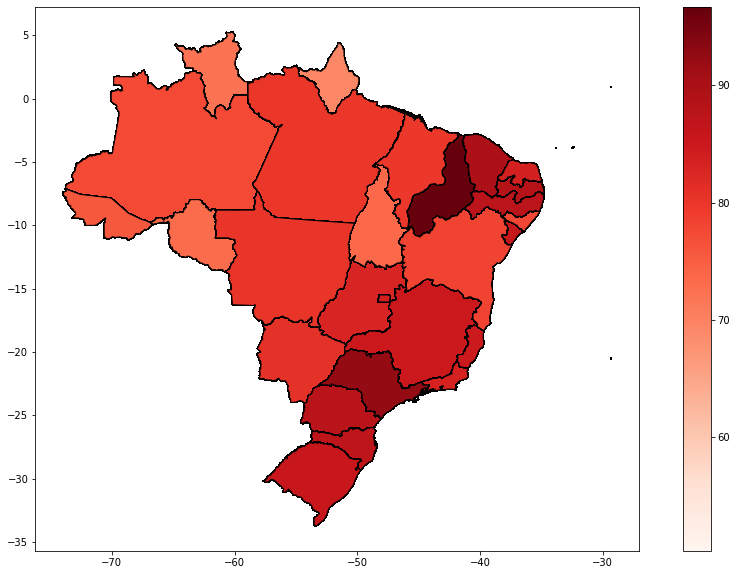

In [ ]:
INFOS_UFS = gpd.read_file('./bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')
INFOS_UFS.rename({'sigla':'state'}, axis = 1, inplace = True)

df_br = INFOS_UFS.merge(data_without_nan_values, on = 'state', how = 'left')

df_br.plot(column = 'vaccinated_per_100_inhabitants',
    cmap  = 'Reds',
    figsize = (16,10),
    legend = True,
    edgecolor = 'black',
    
    )

### Total de casos de Covid por 100k de Habitantes

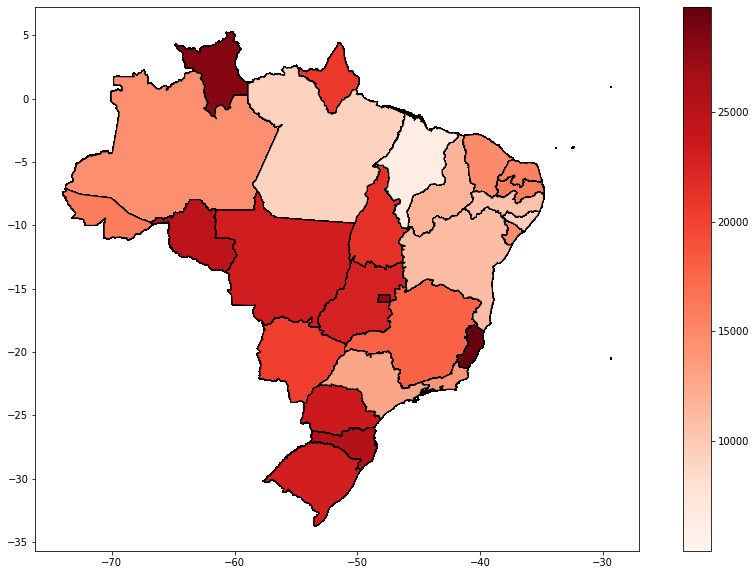

In [ ]:
df_br.plot(column = 'totalCases_per_100k_inhabitants',
    cmap  = 'Reds',
    figsize = (16,10),
    legend = True,
    edgecolor = 'black',
    )

# Regressão  


Análisando a tabela de correlações podemos manter ou retirar algumas colunas para realizar a regressão:

In [ ]:
cols_interesse = [
        'totalCases_per_100k_inhabitants', 'recovered', 'suspects',
       'tests_per_100k_inhabitants',
       'vaccinated_per_100_inhabitants', 
       'vaccinated_second_per_100_inhabitants', 
       'vaccinated_single_per_100_inhabitants', 
       'vaccinated_third_per_100_inhabitants']
target = 'state'

In [ ]:
cols_interesse_all = cols_interesse.copy()
#cols_interesse_all.append(target)  
data = pd.read_csv('./cases-brazil-states.csv')

df = data.dropna() 
df[cols_interesse_all]

,totalCases_per_100k_inhabitants,recovered,suspects,tests_per_100k_inhabitants,vaccinated_per_100_inhabitants,vaccinated_second_per_100_inhabitants,vaccinated_single_per_100_inhabitants,vaccinated_third_per_100_inhabitants
15089,13295.31707,354985.0,1381.0,37019.54598,66.07500,37.91534,8.45132,0.01015
15105,9767.02635,19138604.0,7958935.0,26706.17267,62.45918,28.24164,2.18512,0.00013
15117,13304.60103,357475.0,1381.0,37349.52245,66.17928,38.42790,8.45132,0.01342
15133,9778.09153,19243454.0,7958935.0,26765.35296,62.80953,28.79478,2.18888,0.00017
15145,13311.18617,357475.0,1381.0,37349.52245,66.37856,38.71804,8.45168,0.01932
...,...,...,...,...,...,...,...,...
24229,25560.61673,1607144.0,268966.0,35847.42493,87.06389,79.57843,3.87110,48.72923
24230,14781.24989,313577.0,445.0,26283.72782,85.83088,78.66899,1.82917,52.71271
24231,12813.00708,4850000.0,876238.0,42469.91918,92.32880,86.79788,2.77946,72.07291
24232,21428.14455,281464.0,359.0,57473.10960,73.56062,63.08166,3.49324,30.14987


## Correlações 
A correlação diz se dois atributos no dataset possuem alguma relação. 

In [ ]:
correlations = df.corr()
print(correlations)

                                       epi_week  newDeaths    deaths  \
epi_week                               1.000000  -0.045049 -0.004645   
newDeaths                             -0.045049   1.000000  0.716207   
deaths                                -0.004645   0.716207  1.000000   
newCases                               0.089933   0.744855  0.594109   
totalCases                             0.039462   0.689381  0.987722   
deathsMS                              -0.004638   0.716173  1.000000   
totalCasesMS                           0.039467   0.689256  0.987713   
deaths_per_100k_inhabitants            0.130540   0.056532  0.092174   
totalCases_per_100k_inhabitants        0.385403  -0.099652 -0.113154   
deaths_by_totalCases                  -0.369598   0.169240  0.207788   
recovered                              0.026256   0.687038  0.991219   
suspects                              -0.003072   0.641052  0.883580   
tests                                  0.000391   0.707971  0.99

In [ ]:
df.dtypes

epi_week                                   int64
date                                      object
country                                   object
state                                     object
city                                      object
newDeaths                                  int64
deaths                                     int64
newCases                                   int64
totalCases                                 int64
deathsMS                                   int64
totalCasesMS                               int64
deaths_per_100k_inhabitants              float64
totalCases_per_100k_inhabitants          float64
deaths_by_totalCases                     float64
recovered                                float64
suspects                                 float64
tests                                    float64
tests_per_100k_inhabitants               float64
vaccinated                               float64
vaccinated_per_100_inhabitants           float64
vaccinated_second   

In [ ]:
df['state'] = df["state"].astype('category')
df['state'] = df['state'].cat.codes 
df['city'] = df["city"].astype('category')
df['city'] = df['city'].cat.codes 
df['country'] = df["country"].astype('category')
df['country'] = df['country'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df = pd.get_dummies(df, columns=["state"])

In [ ]:
df = df.drop(['date'], axis=1)

In [ ]:
df.dtypes

epi_week                                   int64
country                                     int8
city                                        int8
newDeaths                                  int64
deaths                                     int64
newCases                                   int64
totalCases                                 int64
deathsMS                                   int64
totalCasesMS                               int64
deaths_per_100k_inhabitants              float64
totalCases_per_100k_inhabitants          float64
deaths_by_totalCases                     float64
recovered                                float64
suspects                                 float64
tests                                    float64
tests_per_100k_inhabitants               float64
vaccinated                               float64
vaccinated_per_100_inhabitants           float64
vaccinated_second                        float64
vaccinated_second_per_100_inhabitants    float64
vaccinated_single   

# Utilização de coeficiente de person para verificar relação entre variáveis

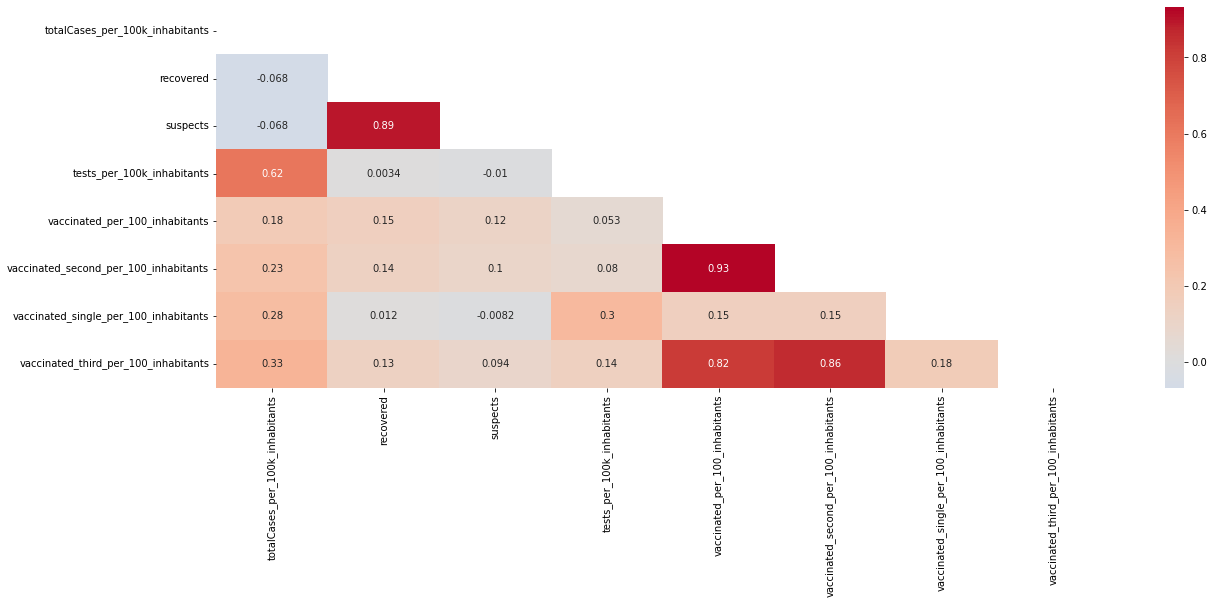

In [ ]:


Var_Corr = df[cols_interesse_all].corr()
matrix = np.triu(df[cols_interesse_all].corr())

plt.figure(figsize = (20,7))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True,center= 0, cmap= 'coolwarm',mask=matrix)

In [ ]:
from sklearn.linear_model import LinearRegression

def regressao_linear(X,Y,cols):

  if len(cols) == 1:
    X = X.values.reshape(-1,1)

  lm = LinearRegression()
  lm.fit(X,Y)
  print('Coeficiente estimado: ', lm.coef_)    
  print('R2 (score): ', lm.score(X,Y))
  print("Intercept %.3f " % lm.intercept_)

  coeff_df = pd.DataFrame(lm.coef_, cols, columns=['Coefficient'])
  print(coeff_df)


In [ ]:
import statsmodels.api as sm  
Y = df['suspects']
cols_interesse_novo = ['recovered'] 

X = df[cols_interesse_novo] 
results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())                  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:               suspects   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                          4.005e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):                        0.00
Time:                        03:46:59   Log-Likelihood:                     -1.3011e+05
No. Observations:                8664   AIC:                                  2.602e+05
Df Residuals:                    8663   BIC:                                  2.602e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Perguntas 

## 1) Qual região do país apresentou maior apatia ao programa de vacinação contra a COVID-19?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[246100.76424, 506147.91456, 207942.08662, 229154.86552, 226248.48038000002]


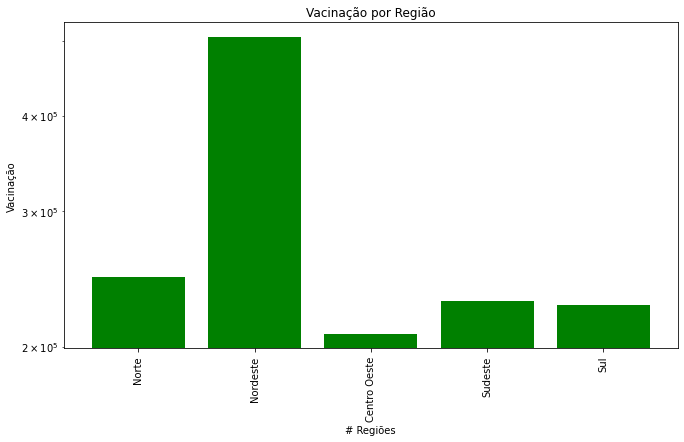

In [ ]:

sudeste = ['ES','MG','RJ','SP']  
nordeste = ['AL','BA','CE','MA','PA','PB','PE','PI','RN','SE']
centro_oeste = ['MT','MS','DF','GO']
norte = ['AM','AC','TO','AP','RO','RR']
sul = ['PR','RS','SC','PR']  


def sum_vac_by_region(region):
  
  sum = 0 
  for state in region:
    sum += df[df['state'] == state]['Total_vac_per_100'].sum()
    
  return sum


def list_of_differentes(regions):
  values = []
  for region in regions:
    values.append(sum_vac_by_region(region))

  return values  
 
cols = ['date', 'state',  'vaccinated_per_100_inhabitants',
       'vaccinated_second_per_100_inhabitants', 
       'vaccinated_single_per_100_inhabitants', 
       'vaccinated_third_per_100_inhabitants']  

data_1 = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',') 
df = data_1.dropna()  
df['Total_vac_per_100'] = df['vaccinated_per_100_inhabitants'] + df['vaccinated_second_per_100_inhabitants'] + df['vaccinated_single_per_100_inhabitants'] + df['vaccinated_third_per_100_inhabitants']

total_vac = df.groupby('state')['Total_vac_per_100'].sum()

values = list_of_differentes([norte,nordeste,centro_oeste,sudeste,sul])
regions = ['Norte','Nordeste','Centro Oeste','Sudeste','Sul'] 


print(values)

plt.figure(figsize =(11, 6))
plt.bar(regions, values, color = 'green')
plt.ylabel("Vacinação")
plt.xlabel("# Regiões")
plt.title("Vacinação por Região")
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.show()


Analisando o gráfic juntamente com as informações coletadas nota-se que a região centro-oeste foi a que mais apresentou apatia à vacinação nos estados que a compõem. 

## 2) Qual região brasileira apresentou maior redução de mortes causadas por COVID-19 após o início das vacinações (Março/Abril 2021)?

In [ ]:
# Regiões

norte = ['AM', 'PA', 'RR', 'AP', 'RO', 'AC' , 'TO']
nordeste =  ['PI', 'MA', 'PE', 'RN', 'PB', 'CE', 'BA', 'AL','SE']
centro_oeste =  ['MT', 'MS','GO']
sudeste =  ['SP', 'RJ', 'ES', 'MG']
sul =  ['RS', 'PR', 'SC']

In [ ]:
start_vaccination = '2021-01-17'

data = data[data != 'TOTAL']

def difference_before_and_after_vaccinating(region):
  sum_before = 0
  sum_after = 0

  df_before = data[data['date']<start_vaccination]
  df_after = data[data['date']>=start_vaccination]

  for state in region:
    sum_before += df_before[df_before['state'] == state]['deaths'].sum()
    sum_after += df_after[df_after['state'] == state]['deaths'].sum()
  
  return sum_after - sum_before


def list_of_differentes(regions):
  values = []
  for region in regions:
    values.append(difference_before_and_after_vaccinating(region))

  return values  

values = list_of_differentes([norte,nordeste,centro_oeste,sudeste,sul])
regions = ['Norte','Nordeste','Centro Oeste','Sudeste','Sul']

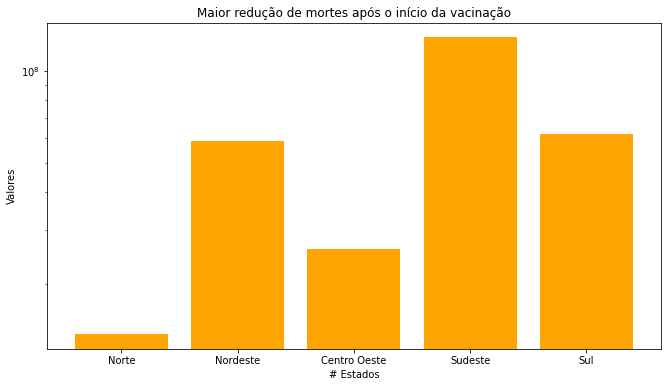

In [ ]:
plt.figure(figsize =(11, 6))
plt.bar(regions, values, color = 'orange')
plt.ylabel("Valores")
plt.xlabel("# Estados")
plt.title("Maior redução de mortes após o início da vacinação")
plt.yscale('log')
plt.show()

## 3) Qual região brasileira é mais afetada pela COVID-19?

In [ ]:
# Para se ter uma métrica justa utilizaremos o total de casos por 100l de habitantes
# totalCases_per_100k_inhabitants

def total_cases_by_region(region):
  sum = 0
  for state in region:
    sum +=  data_without_nan_values[data_without_nan_values['state'] == state]['totalCases_per_100k_inhabitants'].sum()

  return sum


def list_of_values(regions):
  values = []
  for region in regions:
    values.append(total_cases_by_region(region))

  return values

values = list_of_values([norte,nordeste,centro_oeste,sudeste,sul])
regions = ['Norte','Nordeste','Centro Oeste','Sudeste','Sul']

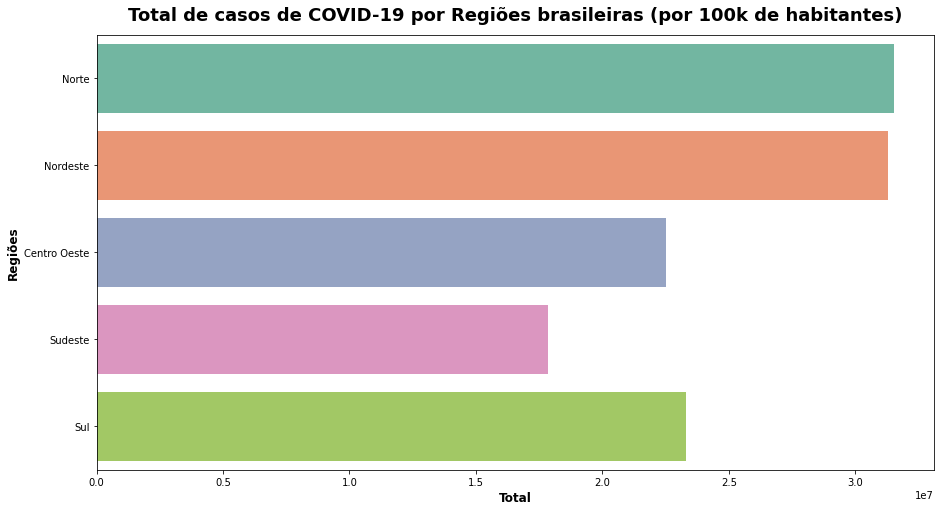

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=values, y =regions , orient="h", palette="Set2")
plt.title('Total de casos de COVID-19 por Regiões brasileiras (por 100k de habitantes)',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif',
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Total', 
           fontdict={'family': 'sans serif',
                     'color' : 'black',
                     'weight': 'bold',
                     'size': 12})
plt.ylabel('Regiões', 
           fontdict={'family': 'sans serif',
                     'color' : 'black',
                     'weight': 'bold',
                     'size': 12})
plt.show()

Nota-se a partir do gráfico anterior que a região Norte é a mais afetada

## 4) Qual o avanço da COVID-19 no interior do Brasil?

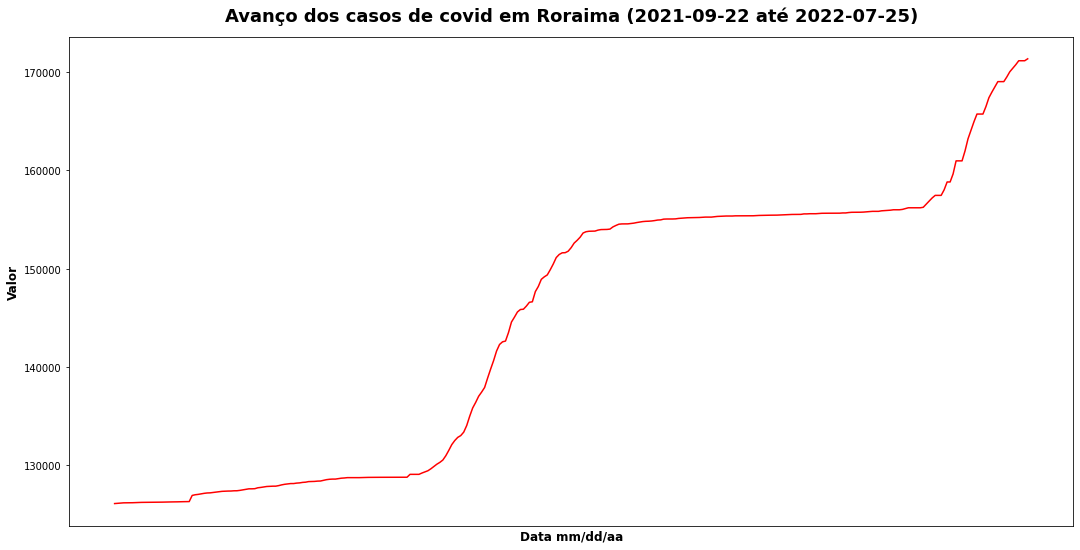

In [ ]:
## Roraima, Amapá e Acre

data_without_nan_values['date'].min()

def plot_graph(dataframe,color,title):
  plt.figure(figsize = (18,9))
  plt.ticklabel_format(style = 'plain')
  plt.xticks([])
  plt.title(title,
            position=(0.5, 1.02),
            fontdict={'family': 'sans serif',
                      'color' : 'black',
                      'weight': 'bold',
                      'size': 18})
  plt.xlabel('Data mm/dd/aa',
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 12})
  plt.ylabel('Valor',
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 12})
  plt.plot(dataframe['date'], dataframe['totalCases'], color = color)
  plt.show()


plot_graph(data_without_nan_values[data_without_nan_values['state'] == 'RR'],'red',"Avanço dos casos de covid em Roraima (2021-09-22 até 2022-07-25)")

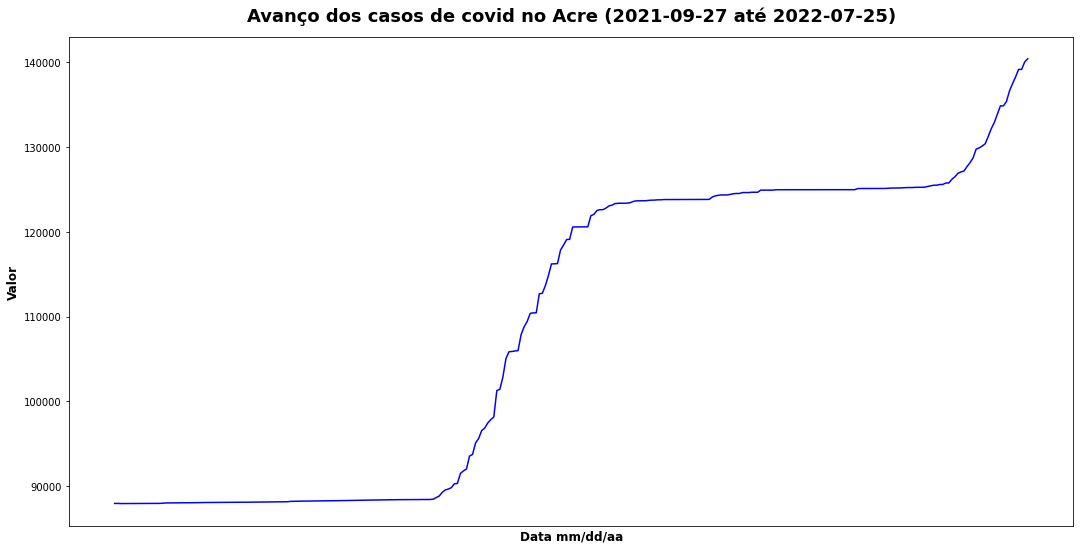

In [ ]:
plot_graph(data_without_nan_values[data_without_nan_values['state'] == 'AC'],'blue',"Avanço dos casos de covid no Acre (2021-09-27 até 2022-07-25)")

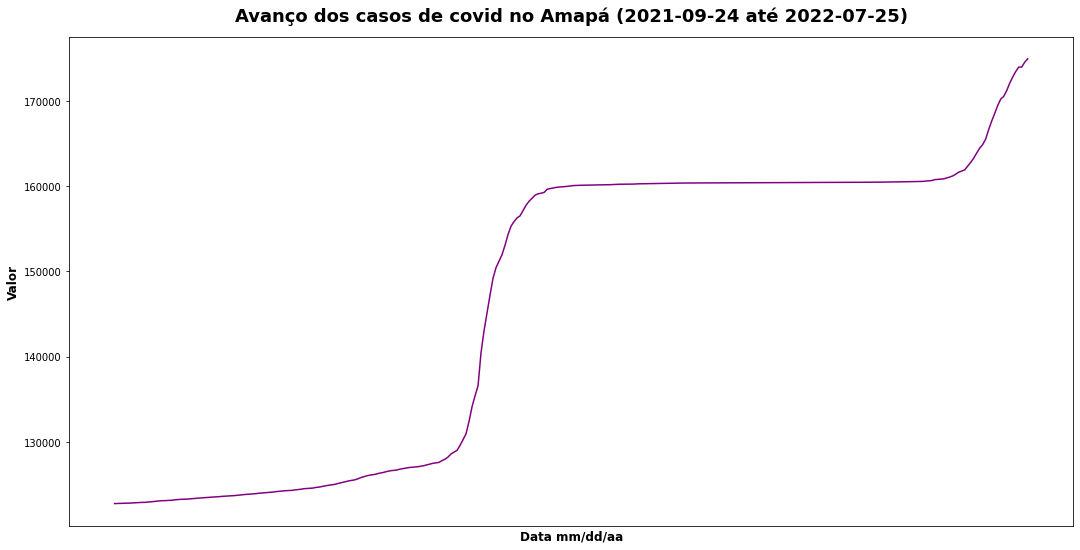

In [ ]:
plot_graph(data_without_nan_values[data_without_nan_values['state'] == 'AP'],'purple',"Avanço dos casos de covid no Amapá (2021-09-24 até 2022-07-25)")

## 5) Qual o aumento relativo de casos suspeitos de COVID-19 em 2022?

In [ ]:
beginning_of_2022 = data_without_nan_values[data_without_nan_values['date']<'2022-01-01']['suspects'].sum()
now = data_without_nan_values['suspects'].sum()

print(f'Teve um aumento relativo de: {now*100/beginning_of_2022}%')

Teve um aumento relativo de: 298.0468324869345%


## 6) Qual estado apresentou maior ocupação de leitos por COVID-19 desde o inicio da pandemia?

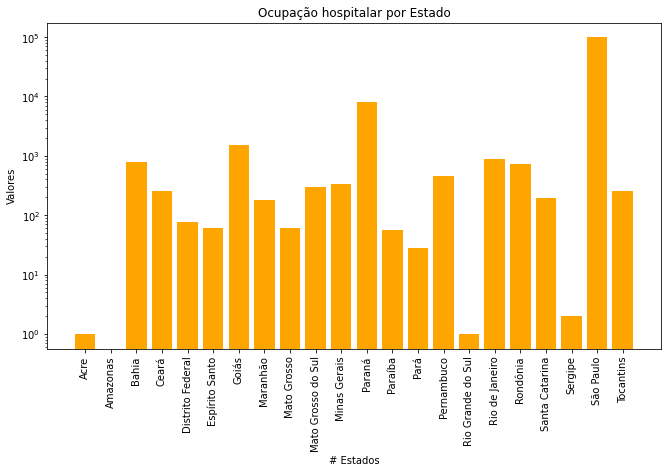

In [7]:
def occupation_per_state(field,title):
    country_group_sum = newDfTotal.groupby('estadoNotificacao')[field].sum()

    plt.figure(figsize =(11, 6))
    plt.bar(country_group_sum.index, country_group_sum.values, color = 'orange')
    plt.ylabel("Valores")
    plt.xlabel("# Estados")
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.yscale('log')
    plt.show()

occupation_per_state('totalOcupacaoCovid',"Ocupação hospitalar por Estado")

# Ao analisar o gráfico com a relação do total de ocupação hospitalar devido a COVID-19, podemos inferir que o estado que mais apresentou ocupação durante os 3 anos de pandemia foi o estado de São Paulo. 

## 7) Qual ano houve a maior incidência de COVID-19 na região sudeste do Brasil?

## 8) Qual estado apresentou maior número de casos por 100 mil habitantes no ano de 2021?

## 9) Qual estado apresentou maior número de mortes por 100 mil habitantes no ano de 2021?


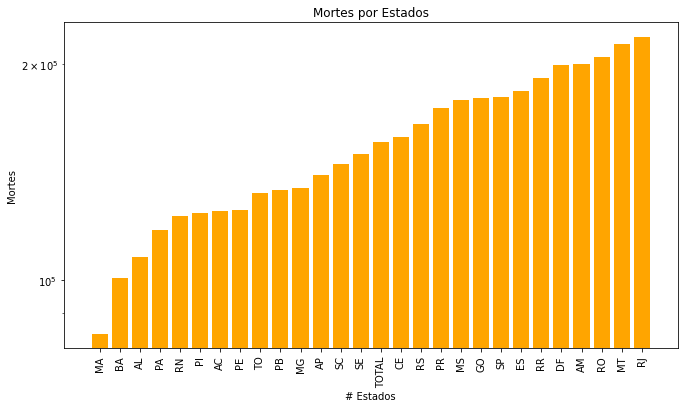

In [ ]:
def get_by_year(df): 
  df["Date"] = pd.to_datetime(df["date"])
  df['Year'] = df['Date'].dt.year  
  df = df.drop('date', axis=1)
  return df[df['Year'] == 2021] 


cols = ['date', 'state',  
       'deaths_per_100k_inhabitants']  

data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',') 
df = data.dropna()      
deaths = data.groupby('state')['deaths_per_100k_inhabitants'].sum().sort_values()
only_21 = get_by_year(df)


plt.figure(figsize =(11, 6))
plt.bar(deaths.index, deaths.values, color = 'orange')
plt.ylabel("Mortes")
plt.xlabel("# Estados")
plt.title("Mortes por Estados")
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.show()


#Percebe-se que o estado em que foi relatado um maior número de mortes por COVID-19 no ano de 2021 foi o Rio de Janeiro

## 10) Qual estado apresentou maior número de recuperados nos três anos de pandemia?


### Para identificar qual estado possuiu maior número de pacientes recuperados do COVID podemos realizar um groupby relacionando os estados e a coluna "recovered". Essa por sua vez, é responsável por guardar o número de casos recuperados, que é incrementado diáriamente.

### Como podemos observar abaixo, o estado de São Paulo possui mais de 4,8 milhões de recuperados de um total de aproximadamente 27,4 milhões em todo o país. Isso ocorre principalmente pelo tamanho da população de SP, bem como, a quantidade de contaminados.

In [15]:
cols_10 = ['suspects','date','state','totalCases','vaccinated', 'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants','totalCases_per_100k_inhabitants','deaths','recovered']
data_10 = pd.read_csv('./cases-brazil-states.csv', usecols = cols, sep=',') 
data_recovered = data_10.groupby('state')['recovered'].max().sort_values(ascending=False).head()
display(data_recovered)

state
TOTAL    27381416.0
SP        4850000.0
MG        3112513.0
RS        2146461.0
RJ        1948731.0
Name: recovered, dtype: float64

### Quando observamos o total de casos por 100.000 habitantes percebemos que São Paulo não está entre os estados mais preocupantes.


In [ ]:
data_100k = data.groupby('state')['totalCases_per_100k_inhabitants'].max().sort_values(ascending=False).head()
display(data_100k)

state
ES    29751.75743
RR    28288.38436
DF    27479.51426
SC    25560.61673
RO    24813.74052
Name: totalCases_per_100k_inhabitants, dtype: float64

### Esse valor representa cerca de 5.65 % do total de recuperados.

In [ ]:
(27381416/4850000)

5.645652783505154

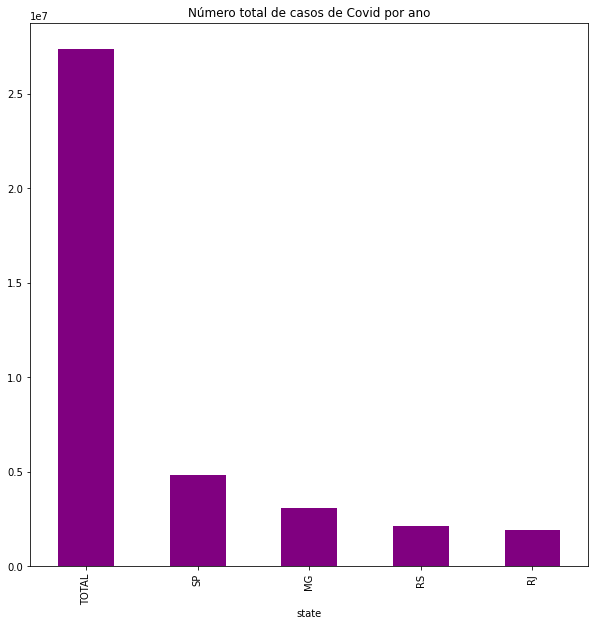

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Número total de casos de Covid por ano")
data_recovered.plot(kind='bar', x='state', y='recovered', color='purple', label = 'recovered')

## 11) Qual estado em teria maior simpatia por uma nova dose de vacina?


## 12) Há alguma relação entre estados e quantidade de doses aplicadas?


## 13) Houve redução no número de casos de COVID-19 após 1 ano da aplicação da primeira dose da vacina contra COVID-19?


### Através do código abaixo podemos cobstatar que as primeiras doses registradas tratam-se do dia 17/01/2021.

In [ ]:
cols_13 = ['vaccinated','date','state','totalCases_per_100k_inhabitants']
data_13 = pd.read_csv('./cases-brazil-states.csv', usecols = cols_13, sep=',')
first_vaccination = data_13[(data_13['state'] == 'TOTAL')].dropna().sort_values(by=['date']).head(1)
first_vaccination

,date,state,totalCases_per_100k_inhabitants,vaccinated
8721,2021-01-17,TOTAL,3980.59581,112.0


### Após 1 ano, os seguintes dados foram coletados:

In [ ]:
first_vaccination_1_year = data_13[(data_13['state'] == 'TOTAL') & (data_13['date'] == '2022-01-17')].dropna().sort_values(by=['date']).head(1)
first_vaccination_1_year

,date,state,totalCases_per_100k_inhabitants,vaccinated
18941,2022-01-17,TOTAL,10824.53617,162370844.0


### Para responder essa pergunta, podemos tomar a porcentagem de contaminação comparada a quantidade de vacinados da seguinte maneira.

In [ ]:
def percent(total_cases, vaccinated):
  return (total_cases/vaccinated)*100

In [ ]:
case_1 = percent(112,3980)
print("Inicio: {:.2f} %".format(case_1))

Inicio: 2.81 %


In [ ]:
case_2 = percent(162370844,10824)
print("Fim: {:.2f} %".format(case_2))

Fim: 1500100.18 %


### Logo, percebemos que comparando o total de casos com o total de vacinados, ocorreu uma redução drástica do número de contaminados.

## 14) Houve redução no número de testes de COVID-19 após 1 ano da aplicação da primeira dose da vacina contra COVID-19?


### De maneira semelhante à questão anterior, é possível retirar as seguintes conclusões.


In [ ]:
cols_14 = ['vaccinated','date','state','totalCases_per_100k_inhabitants','tests_per_100k_inhabitants']
data_14 = pd.read_csv('./cases-brazil-states.csv', usecols = cols_13, sep=',')
first_vaccination = data_13[(data_13['state'] == 'TOTAL')].dropna().sort_values(by=['date']).head(1)
first_vaccination

,date,state,totalCases_per_100k_inhabitants,vaccinated
8721,2021-01-17,TOTAL,3980.59581,112.0


In [ ]:
first_vaccination_1_year = data_13[(data_13['state'] == 'TOTAL') & (data_13['date'] == '2022-01-17')].dropna().sort_values(by=['date']).head(1)
first_vaccination_1_year

,date,state,totalCases_per_100k_inhabitants,vaccinated
18941,2022-01-17,TOTAL,10824.53617,162370844.0


### Dessa forma, é perceptivel que houve um aumento percentual na quantidade de testes realizados.

## 15) Qual estado realizou a maior testagem nos três anos?


### Baseando-se nos dados disponibilizados pelo dataset, podemos observar uma coluna que trata de quantidade de teste realizados por 100.000 habitantes. Dessa forma, agrupando esses dados por estado, é perceptível que Roraima está presente no primeiro lugar.

In [ ]:
cols_15 = ['state','tests_per_100k_inhabitants']
data_15 = pd.read_csv('./cases-brazil-states.csv', usecols = cols_15, sep=',')
data_15.groupby('state').max().sort_values(by=['tests_per_100k_inhabitants'], axis=0, ascending=False).head()

,tests_per_100k_inhabitants
state,
RS,68117.36134
RR,66655.66123
RO,62512.00608
ES,59629.30337
TO,57473.10960


## 16) Qual estado aplicou mais vacinas até o momento?

## 17)   Qual estado apresentou maior sobrecarga do sistema por suspeita de COVID-19 desde o inicio da pandemia?

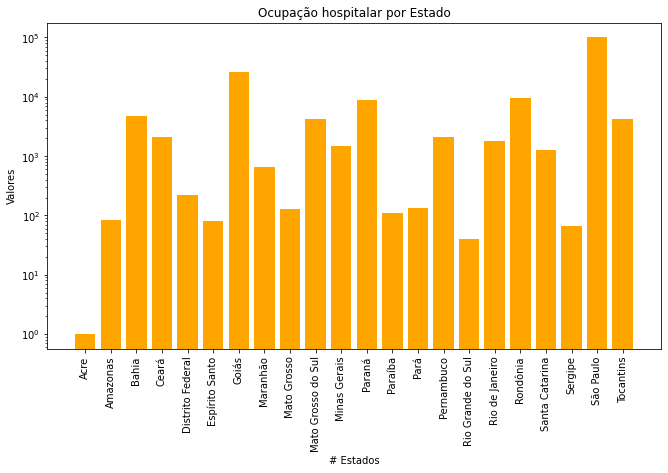

In [8]:
def occupation_per_state(field,title):
    country_group_sum = newDfTotal.groupby('estadoNotificacao')[field].sum()

    plt.figure(figsize =(11, 6))
    plt.bar(country_group_sum.index, country_group_sum.values, color = 'orange')
    plt.ylabel("Valores")
    plt.xlabel("# Estados")
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.yscale('log')
    plt.show()

occupation_per_state('totalOcupacaoHospitalar',"Ocupação hospitalar por Estado")

# Ao analisar o gráfico com a relação do total de ocupação hospitalar devido independente de doença, no periodo da pandemia, podemos inferir que o estado que mais apresentou ocupação durante os 3 anos de pandemia foi o estado de São Paulo. 